# Exercise 1

**USE THE DOUBLE DISPATCH APPROACH**

Use abstract classes if needed.

Consider a program in which different geometric shapes can be drawn on different types of displays.
For simplicity we associate only the name to each geometric shape (we omit the properties of the geometric shape, its coordinates, etc. that we will have to indicate in a real problem).

```python
r = Rectangle('**blue rectangle**') 
c = Circle('**big red circle**')
```

For simplicity, we associate only the name with each display (we omit the hardware properties, resolution, etc. that we will have to indicate in a real problem)

In the example we have a type 1 display (d1) and two type 2 displays (d2_a, d2_b)

```python
d1 = Display1('800x600x8')
d2_a = Display2('1600x1600x16 - A') 
d2_b = Display2('1600x1600x16 - B')
```

**Requirements:**

The specific algorithm for drawing the geometric shape resides in the class of the geometric shape itself. For simplicity, the draw() method merely prints a string:
draw the rectangle **blue rectangle** into the display of type 1 : 800x600x8.

The method to draw the shape is a method of the display object. Example:

```python
d1.draw(c) 
d2_a.draw(r)
```

Write a module `my_graph.py` that can be used with the assigned `main.py`. Complete the`main.py` if needed.
The assigned `main.py` contains (as a comment) the correct, expected output.

Be sure to submit both the main and the module. Your program must work correctly and produce the correct output.

In [1]:
from abc import ABC

class Shape(ABC):
    def __init__(self, description, shape_type):
        self.description = description
        self.shape_type = shape_type
    
    def draw_in_display(self, display):
        print(f"draw the {self.shape_type} {self.description} into the display of type {display.display_type} {display.description}.")

class Rectangle(Shape):
    def __init__(self, description):
        super().__init__(description=description, shape_type='rectangle')

class Circle(Shape):
    def __init__(self, description):
        super().__init__(description=description, shape_type='circle')


class Display(ABC):
    def __init__(self, description, display_type):
        self.description = description
        self.display_type = display_type

    def draw(self, shape):
        shape.draw_in_display(self)

class Display1(Display):
    def __init__(self, description):
        super().__init__(description=description, display_type='1')

class Display2(Display):
    def __init__(self, description):
        super().__init__(description=description, display_type='2')


In [2]:

if __name__ == '__main__':
    print("\n\n")

    r = Rectangle('**blue rectangle**')
    c = Circle('**big red circle**')
    d1 = Display1('800x600x8')
    d2_a = Display2('1600x1600x16 - A')
    d2_b = Display2('1600x1600x16 - B')

    d1.draw(r)
    d1.draw(c)
    d2_a.draw(r)
    d2_a.draw(c)
    d2_b.draw(r)
    d2_b.draw(c)

    print("\n\n")

    """ OUTPUT:
    draw the rectangle  **blue rectangle**  into the display of type 1 : 800x600x8
    draw the circle  **big red circle**  into the display of type 1 : 800x600x8
    draw the rectangle  **blue rectangle**  into the display of type 2 : 1600x1600x16 - A
    draw the circle  **big red circle**  into the display of type 2 : 1600x1600x16 - A
    draw the rectangle  **blue rectangle**  into the display of type 2 : 1600x1600x16 - B
    draw the circle  **big red circle**  into the display of type 2 : 1600x1600x16 - B
    """





draw the rectangle **blue rectangle** into the display of type 1 800x600x8.
draw the circle **big red circle** into the display of type 1 800x600x8.
draw the rectangle **blue rectangle** into the display of type 2 1600x1600x16 - A.
draw the circle **big red circle** into the display of type 2 1600x1600x16 - A.
draw the rectangle **blue rectangle** into the display of type 2 1600x1600x16 - B.
draw the circle **big red circle** into the display of type 2 1600x1600x16 - B.





# Exercise 2

**USE THE STRATEGY DESIGN PATTERN**

Use abstract classes if needed.

A Printer object has two methods, `process_1(el)` and `process_2(el)`, which behave differently on working day or on weekend.
* working day:

  * `process_1(el)` prints the character `el`,
  * `process_2(el)` prints the UPPERCASE character `[el.upper()]`
* weekend:
  * `process_1(el)` prints the UPPERCASE character `[ el.upper() ]` if `el` is not a number, otherwise it prints the number and the string `'-> IT IS A NUMBER!'`
  * `process_2(el)` prints the string `' ASCII -> '`, and the ASCII code `[ord(el)]`

Write a module `printer.py` that can be used with the assigned `main.py.` Complete the `main.py` if needed.
The assigned `main.py` contains (as a comment) the correct, expected output.
Be sure to submit both the main and the module. Your program must work correctly and produce the correct output.

In [4]:
from abc import ABC, abstractmethod

class PrinterStrategy(ABC):

    @staticmethod
    @abstractmethod
    def process_1(element):
        pass

    @staticmethod
    @abstractmethod
    def process_2(element):
        pass

class PrinterStrategyWorking(PrinterStrategy):

    @staticmethod
    def process_1(element):
        print(element)

    @staticmethod
    def process_2(element):
        print(element.upper())

class PrinterStrategyWeekend(PrinterStrategy):

    @staticmethod
    def process_1(element):
        if not element.isnumeric():
            print(element.upper())
        else:
            print(element, '-> IT IS A NUMBER!')


    @staticmethod
    def process_2(element):
        print(element, ' ASCII -> ', ord(element))


class Printer:
    def __init__(self, strategy):
        self._strategy = strategy

    @property
    def strategy(self):
        return self._strategy
    
    @strategy.setter
    def strategy(self, new_strategy):
        self._strategy = new_strategy
    
    def process_1(self, element):
        self.strategy.process_1(element)
    
    def process_2(self, element):
        self.strategy.process_2(element)




In [8]:

if __name__ == '__main__':
    
    print("\n\n")

    p = Printer(PrinterStrategyWorking())
    elements = ['a', 'B', '3']

    print('MONDAY - FRIDAY')
    for el in elements:
        p.process_1(el)
        p.process_2(el)

    
    print("\n\n")
    print('SATURDAY - SUNDAY')
    p.strategy = PrinterStrategyWeekend()

    for el in elements:
        p.process_1(el)
        p.process_2(el)

    """OUTPUT:


    MONDAY - FRIDAY
    a
    A
    B
    B
    3
    3

    SATURDAY - SUNDAY
    A
    a  ASCII ->  97
    B
    B  ASCII ->  66
    3  -> IT IS A NUMBER!
    3  ASCII ->  51

    """




MONDAY - FRIDAY
a
A
B
B
3
3



SATURDAY - SUNDAY
A
a  ASCII ->  97
B
B  ASCII ->  66
3 -> IT IS A NUMBER!
3  ASCII ->  51


# Exercise 3

**USE THE OBSERVER DESIGN PATTERN**

Use abstract classes if needed.

A Printer object has two methods, `process_1(el)` and `process_2(el)`, which behave differently on working day or on weekend, as in the Exercise 2.

**New requirements**

Different observers `s_1, ... , s_n` may be interested in a change of strategy. If the strategy changes, the interested observers must print

`s_1 -> New Strategy!` 

`s_2 -> New Strategy!`

If an observer (i.e., `s_1`) is no more interested in the event, when the strategy changes the output will be

`s_2 -> New Strategy!`

Complete the module `printer.py` and the `main.py`.
The assigned `main.py` contains (as a comment) the correct, expected output.

Be sure to submit both the main and the module. Your program must work correctly and produce the correct output.

In [17]:
class Observer:
    def __init__(self, name):
        self.name = name

    def update(self):
        print(f"{self.name} -> New Strategy!")

from abc import ABC, abstractmethod

class PrinterStrategy(ABC):

    @staticmethod
    @abstractmethod
    def process_1(element):
        pass

    @staticmethod
    @abstractmethod
    def process_2(element):
        pass

class PrinterStrategyWorking(PrinterStrategy):

    @staticmethod
    def process_1(element):
        print(element)

    @staticmethod
    def process_2(element):
        print(element.upper())

class PrinterStrategyWeekend(PrinterStrategy):

    @staticmethod
    def process_1(element):
        if not element.isnumeric():
            print(element.upper())
        else:
            print(element, '-> IT IS A NUMBER!')


    @staticmethod
    def process_2(element):
        print(element, ' ASCII -> ', ord(element))


class Printer:
    def __init__(self, strategy):
        self._strategy = strategy
        self.observers = list()

    @property
    def strategy(self):
        return self._strategy
    
    @strategy.setter
    def strategy(self, new_strategy):
        self.dispatch()
        self._strategy = new_strategy
    
    def process_1(self, element):
        self.strategy.process_1(element)
    
    def process_2(self, element):
        self.strategy.process_2(element)

    def register(self, observer):
        if observer not in self.observers:
            self.observers.append(observer)
    
    def unregister(self, observer):
        if observer in self.observers:
            self.observers.remove(observer)

    def dispatch(self):
        for observer in self.observers:
            observer.update()






In [18]:
if __name__ == '__main__':

    print("\n\n")


    p = Printer(PrinterStrategyWorking())
    elements = ['a', 'B', '3']

    # Observers s1 and s2 are interested in strategy changes
    # HERE I'M USING THE INITIAL STRATEGY - NO CHANGES
    s1 = Observer("s_1")
    s2 = Observer("s_2")
    p.register(s1)
    p.register(s1)
    p.register(s2)
    
    print('MONDAY - FRIDAY')
    for el in elements:
        p.process_1(el)
        p.process_2(el)

    print("\n\n")
    print('SATURDAY - SUNDAY')
    # CHANGE STRATEGY - Observers must print
    # s1 ->  New Strategy!
    # s2 ->  New Strategy!
    p.strategy = PrinterStrategyWeekend()

    for el in elements:
        p.process_1(el)
        p.process_2(el)


    # Observer s1 is no more interested in strategy changes
    p.unregister(s1)

    print("\n\n")
    print('MONDAY - FRIDAY')

    # CHANGE STRATEGY - Observers must print
    p.strategy = PrinterStrategyWorking()

    # s2 ->  New Strategy!


    for el in elements:
        p.process_1(el)
        p.process_2(el)







MONDAY - FRIDAY
a
A
B
B
3
3



SATURDAY - SUNDAY
s_1 -> New Strategy!
s_2 -> New Strategy!
A
a  ASCII ->  97
B
B  ASCII ->  66
3 -> IT IS A NUMBER!
3  ASCII ->  51



MONDAY - FRIDAY
s_2 -> New Strategy!
a
A
B
B
3
3


# Exercise 4

**USE THE STATE DESIGN PATTERN**

Implement a state machine for a washing machine. 
It has three states:

* idle (initial state)
* washing (when it is in idle and receives the signal `"coin"`)
* drying (when it is in the washing state and receives another `"coin"`).

When the washing machine is in washing or drying, if it receives the command `"open"` it goes back in the idle state. 
If it is in the idle state and receives `"open"`, it stays in the idle state.



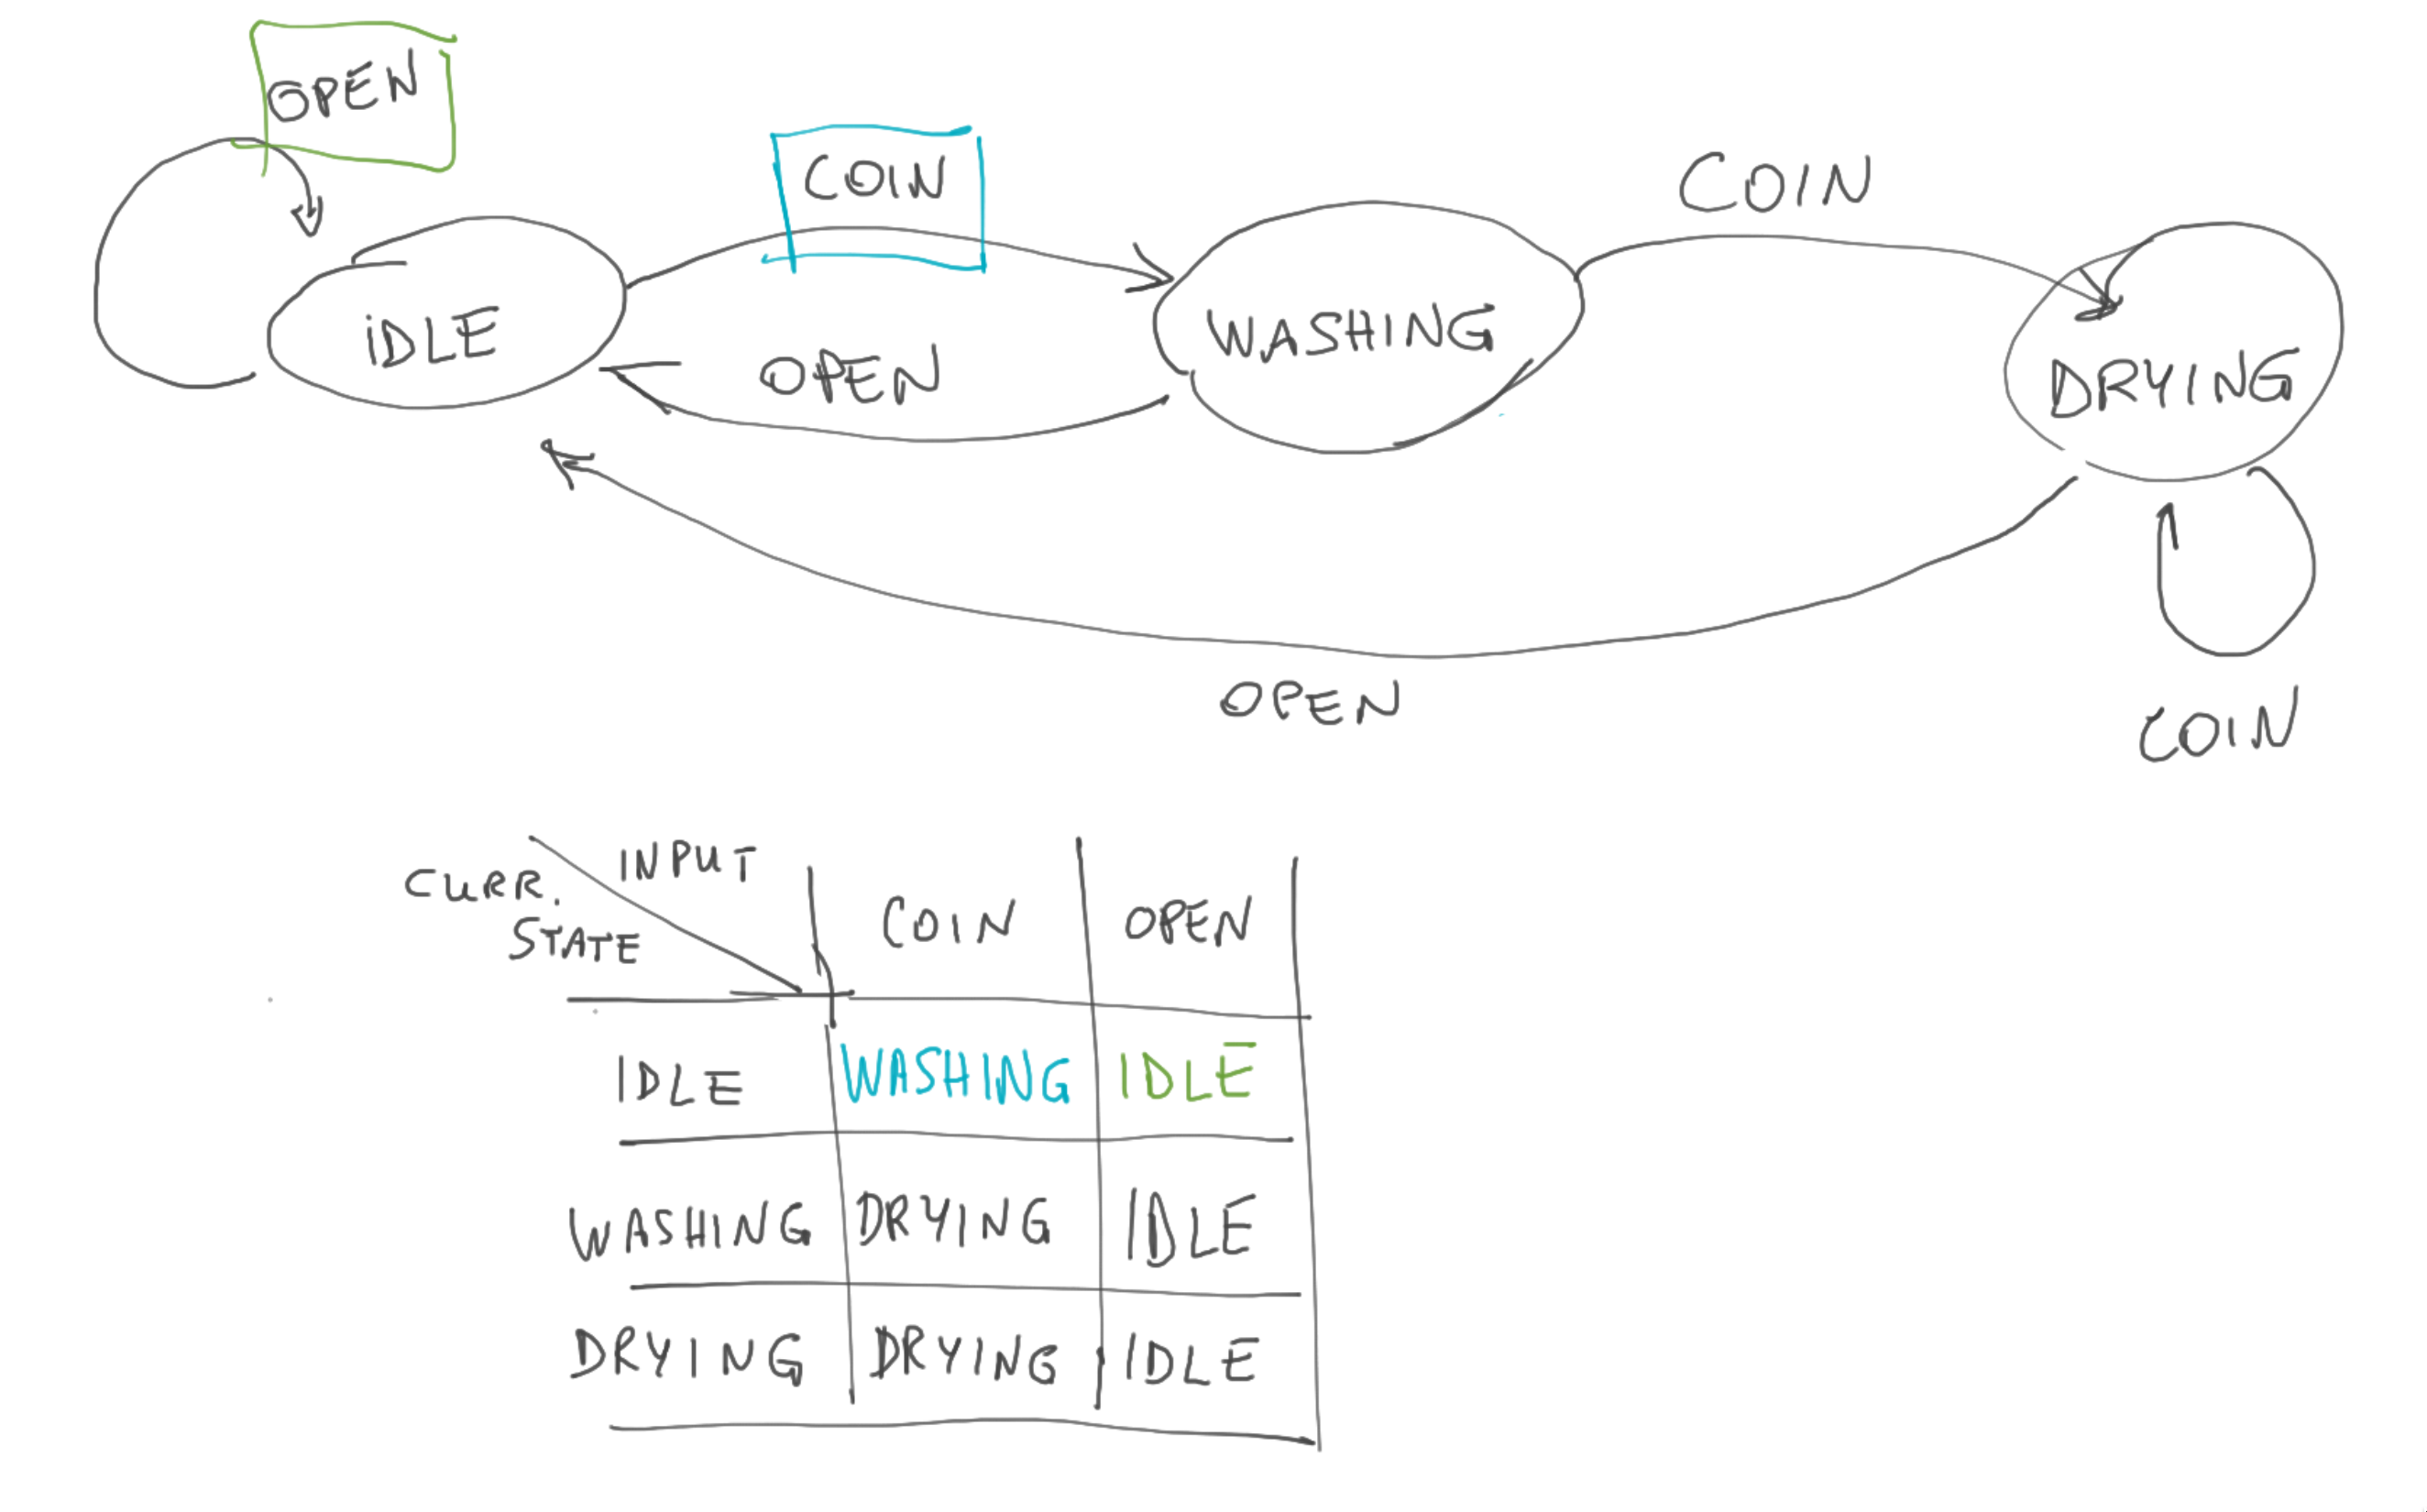

In [20]:
from abc import ABC, abstractmethod

COIN = "coin"
OPEN = "open"

class WMState(ABC):

    @staticmethod
    @abstractmethod
    def work():
        pass
    
    @abstractmethod
    def receive(self, signal, washing_machine):
        pass

class IdleState(WMState):

    @staticmethod
    def work():
        print("I'm in idle state.")
    
    def receive(self, signal, washing_machine):
        if signal == COIN:
            washing_machine.change_state(WashingState())

class WashingState(WMState):

    @staticmethod
    def work():
        print("I'm in washing state.")
    
    def receive(self, signal, washing_machine):
        if signal == COIN:
            washing_machine.change_state(DryingState())
        if signal == OPEN:
            washing_machine.change_state(IdleState())

class DryingState(WMState):

    @staticmethod
    def work():
        print("I'm in drying state.")
    
    def receive(self, signal, washing_machine):
        if signal == OPEN:
            washing_machine.change_state(IdleState())

class WashingMachine:
    def __init__(self):
        self.state = IdleState()
    
    def change_state(self, new_state):
        self.state = new_state
        self.state.work()
    
    def insert_coin(self):
        self.state.receive(COIN, self)

    def open_door(self):
        self.state.receive(OPEN, self)

w = WashingMachine()

w.insert_coin()  # goes to washing state
w.insert_coin()  # goes to drying state
w.open_door()  # goes to idle state
w.insert_coin()  # goes to washing state
w.open_door()  # goes to idle state


I'm in washing state.
I'm in drying state.
I'm in idle state.
I'm in washing state.
I'm in idle state.
